In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import matplotlib
import pandas as pd
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

10.0
['sans-serif']


In [2]:
emd_area = gpd.GeoDataFrame.from_file('./EMD_202005/EMD.shp', encoding='cp949')
emd_area.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [3]:
ctprvn_area = gpd.GeoDataFrame.from_file('./CTPRVN_202005/CTPRVN.shp', encoding='cp949')
ctprvn_area.head()

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,대구광역시,"POLYGON ((1107777.593 1780522.269, 1107845.409..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


In [4]:
sig_area = gpd.GeoDataFrame.from_file('./SIG_202005/SIG.shp', encoding='cp949')
sig_area.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


In [5]:
adCode_excel = pd.read_excel('./adCode_20201001.xlsx', sheet_name='법정동코드 연계 자료분석용', dtype='str')
adCode_excel.head()

,행정구역분류와 행정기관 및 법정동코드 연계표(2020.10.1.기준),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고,연계표 정비결과
1,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,11,1100000000,19880423,1100000000,NaN,Seoul,NaN,NaN
2,서울특별시,종로구,종로구,종로구,종로구,11010,1111000000,19880423,1111000000,NaN,Jongno-gu,NaN,NaN
3,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN,NaN
4,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN,NaN


In [6]:
columnName = {
    '행정구역분류와 행정기관 및 법정동코드 연계표(2020.10.1.기준)': '시도',
    'Unnamed: 1': '시군구',
    'Unnamed: 2':  '행정구역명',
    'Unnamed: 3': '행정동(행정기관명)',
    'Unnamed: 4': '법정동',
    'Unnamed: 5': '행정구역코드',
    'Unnamed: 6': '행정기관코드',
    'Unnamed: 7': '행정기관 생성일',
    'Unnamed: 8': '법정동코드',
    'Unnamed: 9': '법정동 관할지역',
    'Unnamed: 10': '행정동 영문명칭',
    'Unnamed: 11': '비고',
    'Unnamed: 12': '연계표 정비결과'
}
adCode_excel_rename = adCode_excel.rename(columnName, axis='columns')
adCode_excel_rename.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고,연계표 정비결과
0,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고,연계표 정비결과
1,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,11,1100000000,19880423,1100000000,NaN,Seoul,NaN,NaN
2,서울특별시,종로구,종로구,종로구,종로구,11010,1111000000,19880423,1111000000,NaN,Jongno-gu,NaN,NaN
3,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN,NaN
4,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN,NaN


In [7]:
adCode_EMD = adCode_excel_rename[adCode_excel_rename['행정구역코드'].str.len()>6].copy()
adCode_EMD.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고,연계표 정비결과
3,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN,NaN
4,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN,NaN
5,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072,1111051500,20081101,1111010300,NaN,Cheongunhyoja-dong,NaN,NaN
6,서울특별시,종로구,청운효자동,청운효자동,효자동,1101072,1111051500,20081101,1111010400,NaN,Cheongunhyoja-dong,NaN,NaN
7,서울특별시,종로구,청운효자동,청운효자동,창성동,1101072,1111051500,20081101,1111010500,NaN,Cheongunhyoja-dong,NaN,NaN


In [8]:
adCode_EMD.loc[:,'EMD_CD'] = adCode_EMD['법정동코드'].str.slice_replace(start=8, stop=10, repl='')
#gyeonggi_dentist['geometry'] = gyeonggi_dentist.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
adCode_EMD.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고,연계표 정비결과,EMD_CD
3,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN,NaN,11110101
4,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN,NaN,11110102
5,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072,1111051500,20081101,1111010300,NaN,Cheongunhyoja-dong,NaN,NaN,11110103
6,서울특별시,종로구,청운효자동,청운효자동,효자동,1101072,1111051500,20081101,1111010400,NaN,Cheongunhyoja-dong,NaN,NaN,11110104
7,서울특별시,종로구,청운효자동,청운효자동,창성동,1101072,1111051500,20081101,1111010500,NaN,Cheongunhyoja-dong,NaN,NaN,11110105


In [9]:
adCode_EMD.drop(['행정기관코드','행정기관 생성일','법정동코드','법정동 관할지역','행정동 영문명칭','비고','연계표 정비결과'], axis='columns', inplace=True)
adCode_EMD.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,EMD_CD
3,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,11110101
4,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,11110102
5,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072,11110103
6,서울특별시,종로구,청운효자동,청운효자동,효자동,1101072,11110104
7,서울특별시,종로구,청운효자동,청운효자동,창성동,1101072,11110105


In [10]:
for ad_index, ad_item in adCode_EMD.iterrows():
    for emd_index, emd_item in emd_area.iterrows():
        if(ad_item['EMD_CD'] == emd_item['EMD_CD']):
            if(ad_item['법정동'] != emd_item['EMD_KOR_NM']):
                print(f"{ad_item['EMD_CD']} 코드는 ad는 {ad_item['법정동']}, EMD는 {emd_item['EMD_KOR_NM']}로 다릅니다.")

26710250 코드는 ad는 동부리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 교리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 신천리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 죽성리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 서부리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 대라리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 청강리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 대변리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 연화리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 만화리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 석산리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 당사리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 시랑리, EMD는 기장읍로 다릅니다.
26710250 코드는 ad는 내리, EMD는 기장읍로 다릅니다.
26710253 코드는 ad는 좌천리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 효암리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 고리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 좌동리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 장안리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 덕선리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 용소리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 기룡리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 명례리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 월내리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 반룡리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad는 임랑리, EMD는 장안읍로 다릅니다.
26710253 코드는 ad

In [11]:
ad_area = pd.merge(adCode_EMD, emd_area, on='EMD_CD', how= 'inner')
ad_area.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,서울특별시,종로구,청운효자동,청운효자동,효자동,1101072,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,서울특별시,종로구,청운효자동,청운효자동,창성동,1101072,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [12]:
ad_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21327 entries, 0 to 21326
Data columns (total 10 columns):
시도            21327 non-null object
시군구           21327 non-null object
행정구역명         21327 non-null object
행정동(행정기관명)    21327 non-null object
법정동           21327 non-null object
행정구역코드        21327 non-null object
EMD_CD        21327 non-null object
EMD_ENG_NM    21327 non-null object
EMD_KOR_NM    21327 non-null object
geometry      21327 non-null geometry
dtypes: geometry(1), object(9)
memory usage: 1.8+ MB


In [13]:
ad_area_gdf = gpd.GeoDataFrame(ad_area, geometry=ad_area['geometry'])
ad_area_gdf.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,서울특별시,종로구,청운효자동,청운효자동,효자동,1101072,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,서울특별시,종로구,청운효자동,청운효자동,창성동,1101072,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


In [14]:
ad_area_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21327 entries, 0 to 21326
Data columns (total 10 columns):
시도            21327 non-null object
시군구           21327 non-null object
행정구역명         21327 non-null object
행정동(행정기관명)    21327 non-null object
법정동           21327 non-null object
행정구역코드        21327 non-null object
EMD_CD        21327 non-null object
EMD_ENG_NM    21327 non-null object
EMD_KOR_NM    21327 non-null object
geometry      21327 non-null geometry
dtypes: geometry(1), object(9)
memory usage: 1.8+ MB


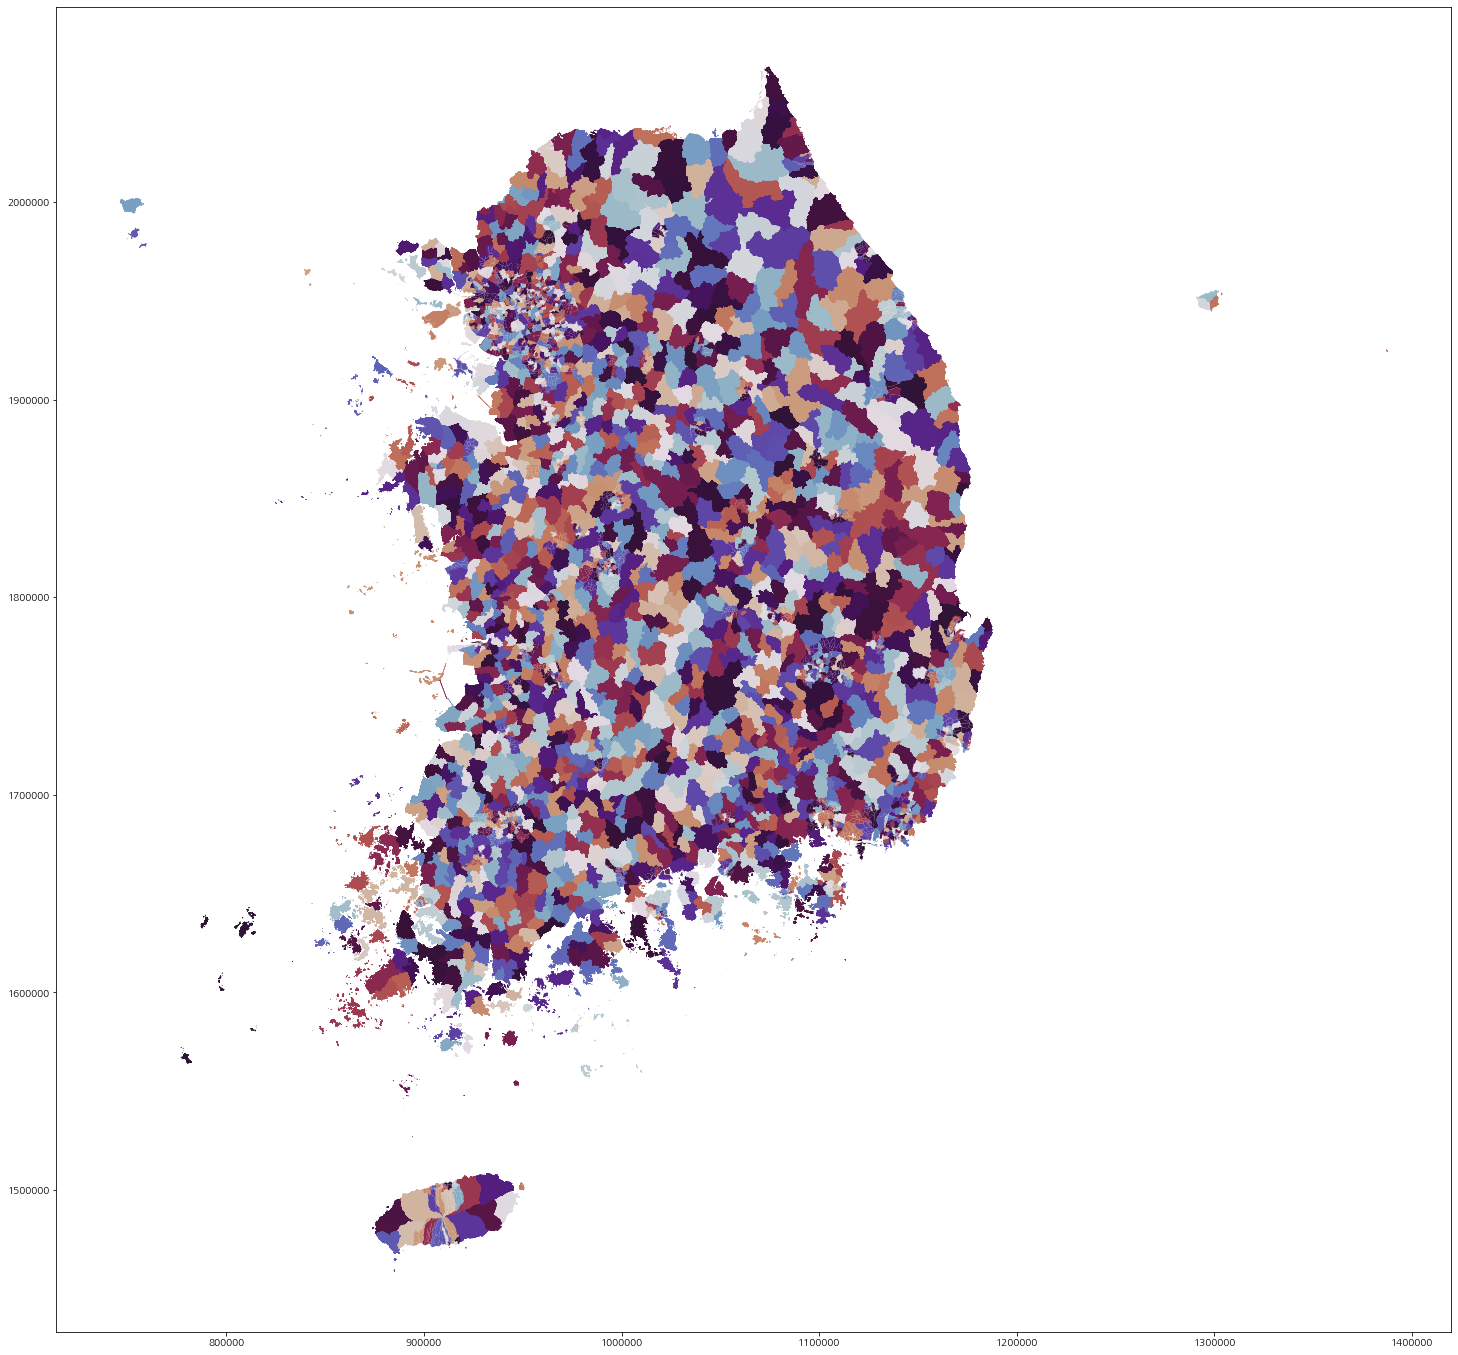

In [44]:
ad_area_gdf.plot(column='행정구역명',figsize=(25,25),cmap='twilight_shifted')

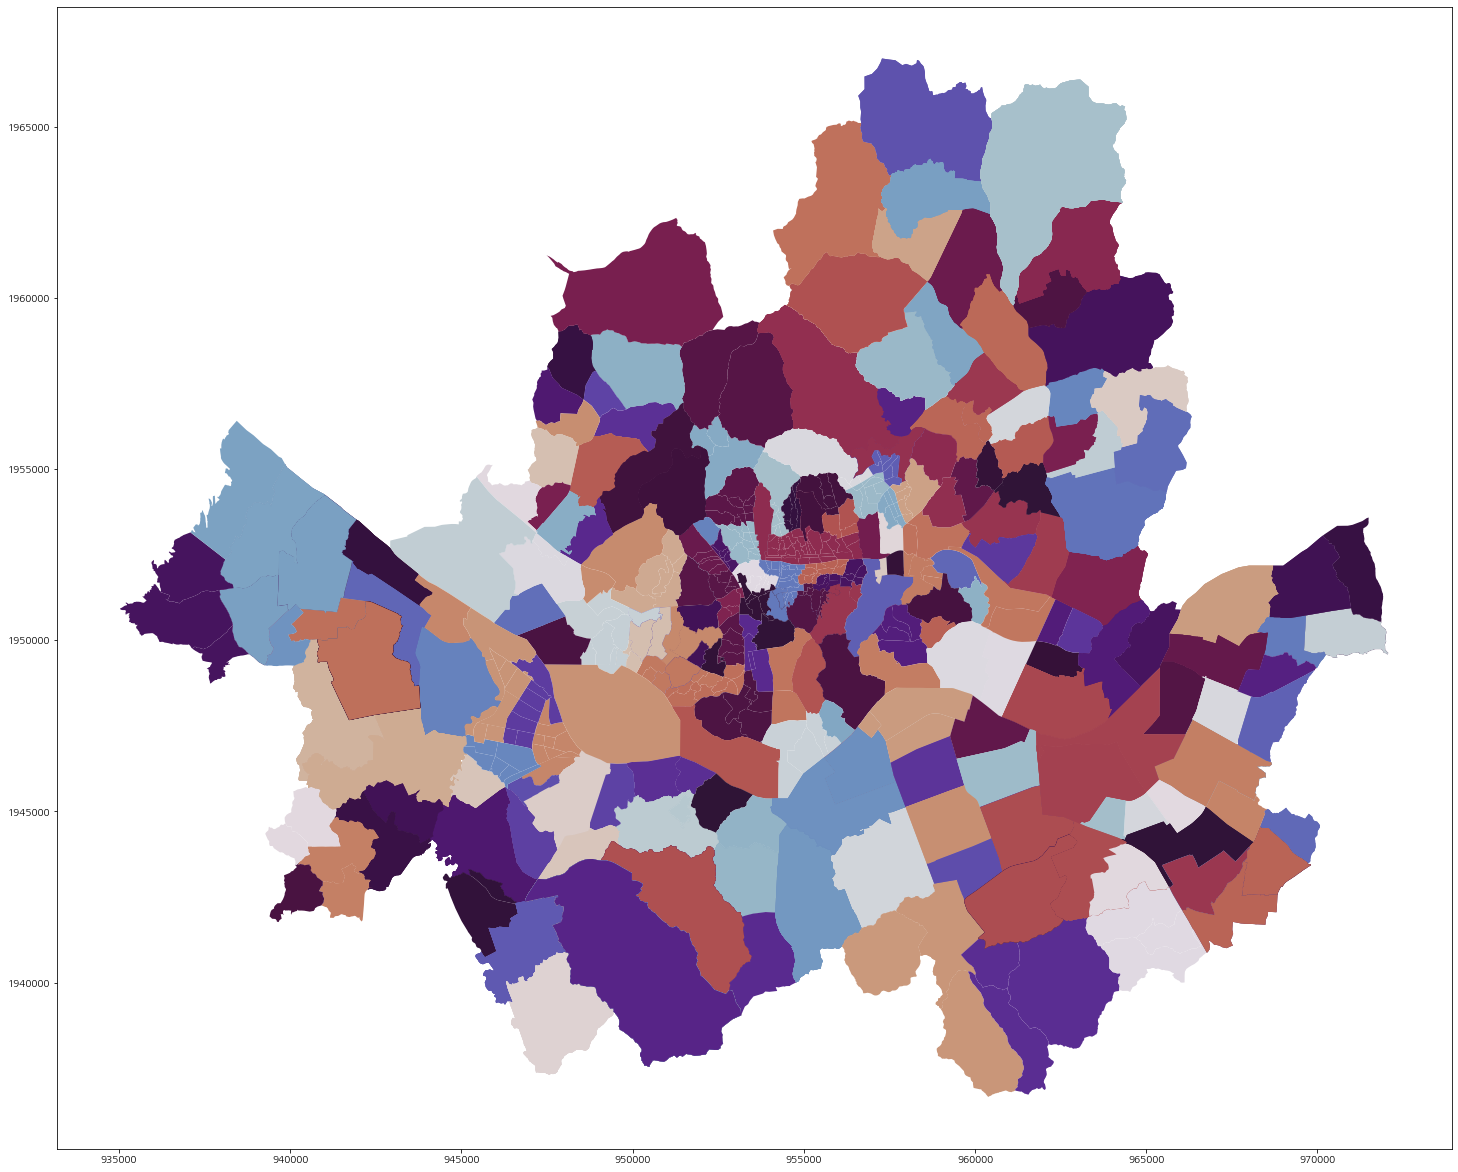

In [43]:
seoul_ad_area = ad_area_gdf[ad_area_gdf['시도']=='서울특별시']
seoul_ad_area.plot(column='행정동(행정기관명)',figsize=(25,25),cmap='twilight_shifted')

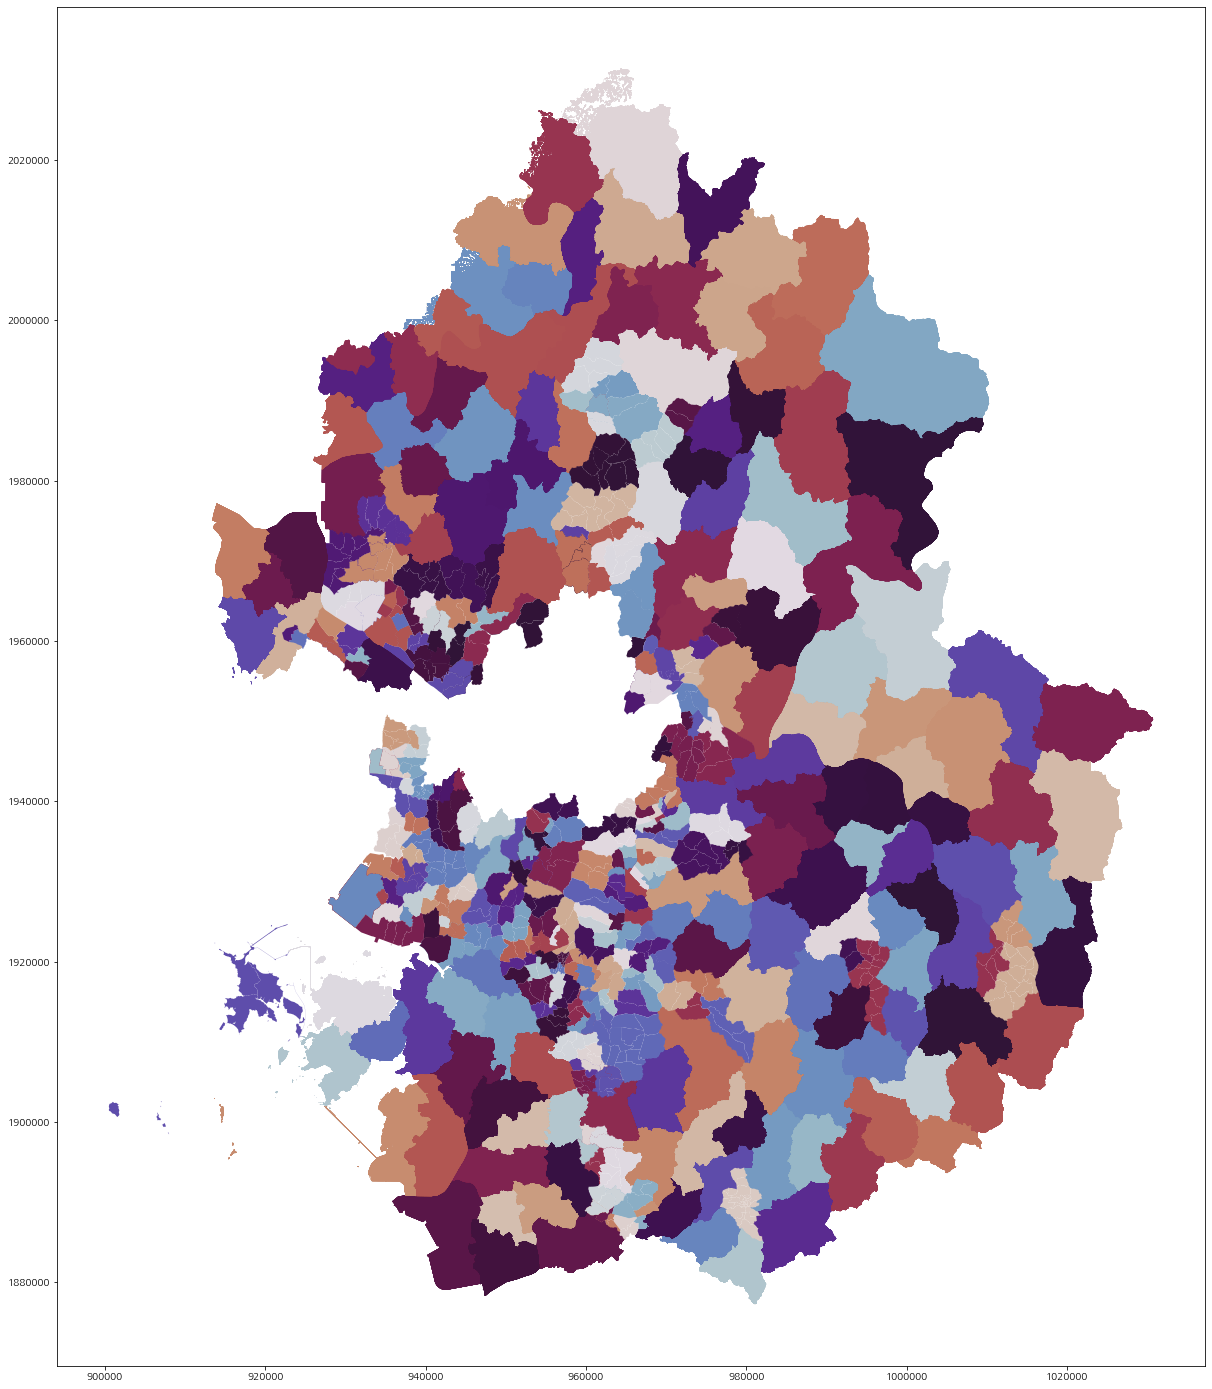

In [45]:
gyeonggi_ad_area = ad_area_gdf[ad_area_gdf['시도']=='경기도']
gyeonggi_ad_area.plot(column='행정동(행정기관명)',figsize=(25,25),cmap='twilight_shifted')

In [18]:
gwanggyo_ad_area = ad_area_gdf[ad_area_gdf['행정구역명'].str.contains('광교')]
gwanggyo_ad_area.head(10)

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
2757,경기도,수원시 영통구,광교1동,광교1동,이의동,3101462,41117103,Iui-dong,이의동,"POLYGON ((959903.465 1924278.680, 959905.829 1..."
2758,경기도,수원시 영통구,광교2동,광교2동,하동,3101463,41117104,Ha-dong,하동,"POLYGON ((963418.474 1922209.041, 963446.058 1..."


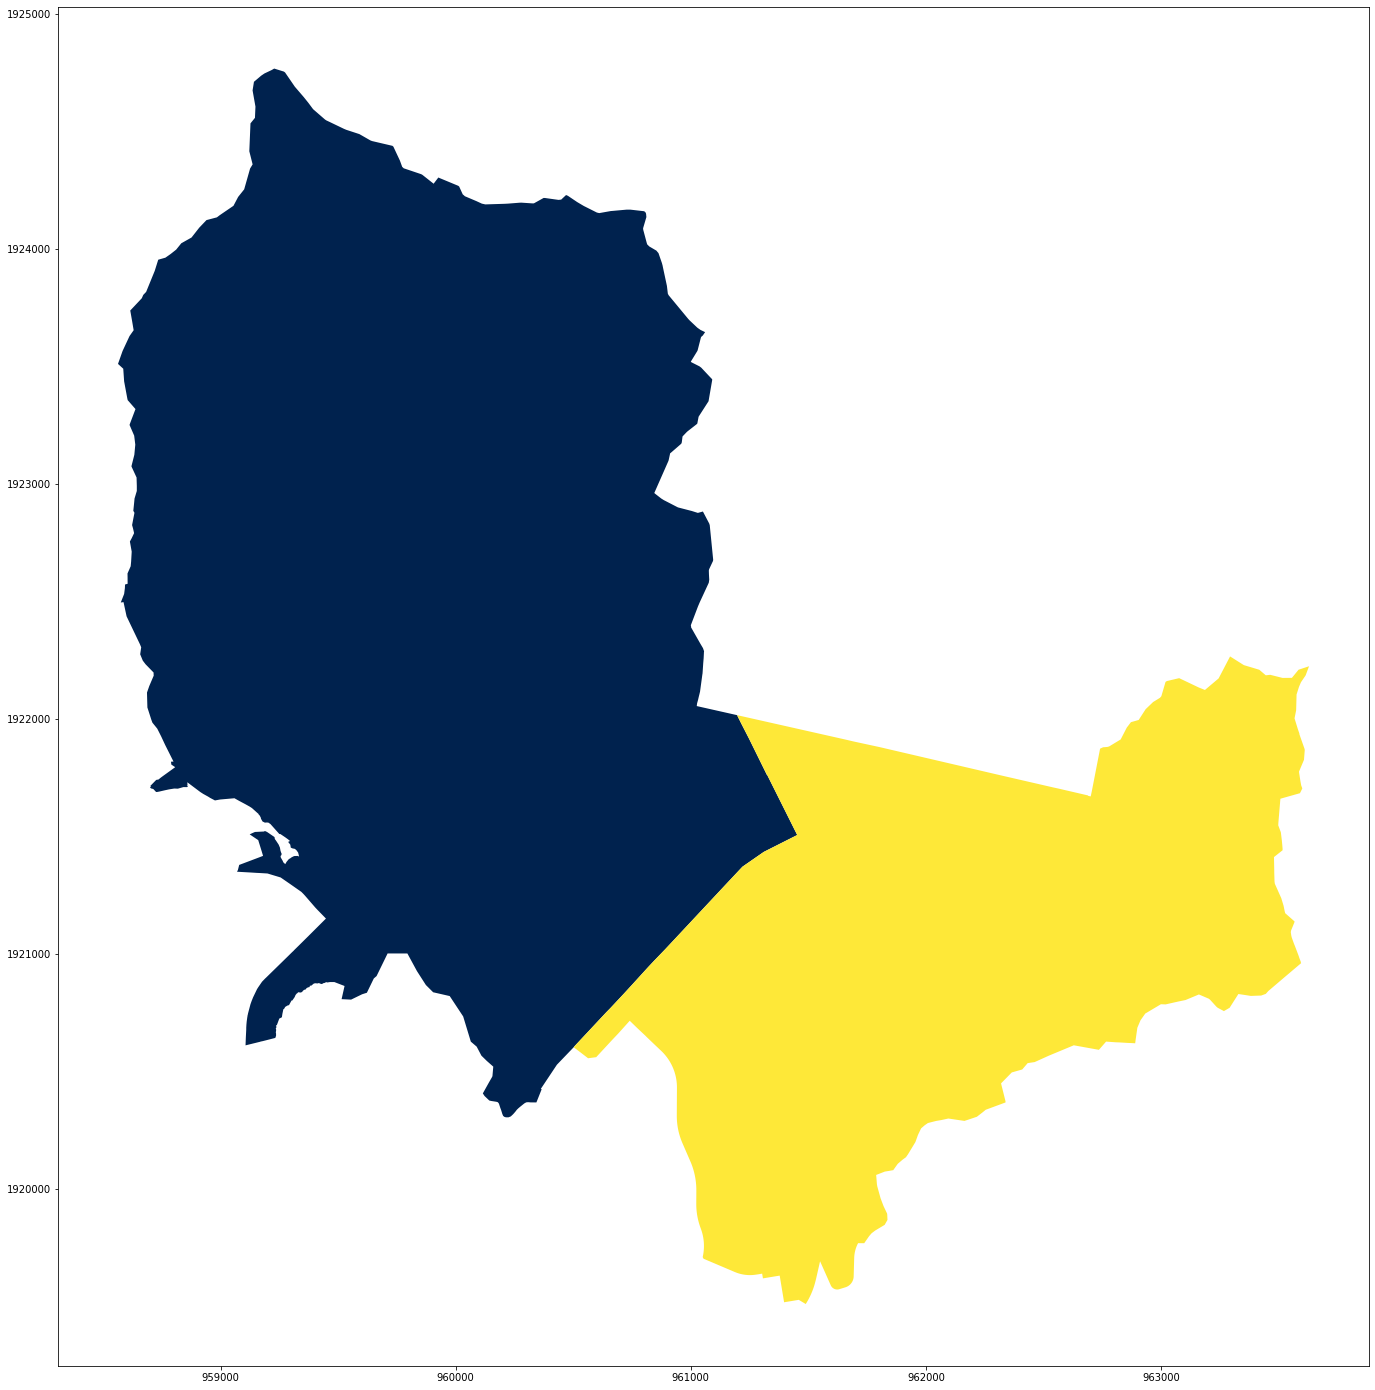

In [19]:
gwanggyo_ad_area.plot(column='행정동(행정기관명)',figsize=(25,25),cmap='cividis')

In [20]:
dongtan_ad_area = ad_area_gdf[ad_area_gdf['행정구역명'].str.contains('동탄')]
dongtan_ad_area.head(10)

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
4323,경기도,화성시,동탄3동,동탄3동,능동,3124062,41590118,Neung-dong,능동,"POLYGON ((960906.208 1911317.755, 960906.550 1..."
4334,경기도,화성시,동탄1동,동탄1동,반송동,3124061,41590127,Bansong-dong,반송동,"POLYGON ((962985.905 1909578.215, 962977.415 1..."
4335,경기도,화성시,동탄2동,동탄2동,반송동,3124060,41590127,Bansong-dong,반송동,"POLYGON ((962985.905 1909578.215, 962977.415 1..."
4336,경기도,화성시,동탄1동,동탄1동,석우동,3124061,41590128,Seogu-dong,석우동,"POLYGON ((963445.475 1913165.328, 963455.050 1..."
4337,경기도,화성시,동탄4동,동탄4동,청계동,3124064,41590130,Cheonggye-dong,청계동,"POLYGON ((967166.855 1911441.665, 967196.158 1..."
4338,경기도,화성시,동탄5동,동탄5동,영천동,3124065,41590131,Yeongcheon-dong,영천동,"POLYGON ((963247.538 1911847.557, 963250.648 1..."
4339,경기도,화성시,동탄5동,동탄5동,중동,3124065,41590132,Jung-dong,중동,"POLYGON ((969025.009 1913502.752, 969036.227 1..."
4340,경기도,화성시,동탄7동,동탄7동,신동,3124069,41590133,Sin-dong,신동,"POLYGON ((969142.006 1911124.678, 969144.349 1..."
4341,경기도,화성시,동탄7동,동탄7동,목동,3124069,41590134,Mok-dong,목동,"POLYGON ((967296.524 1910830.035, 967296.415 1..."
4342,경기도,화성시,동탄7동,동탄7동,산척동,3124069,41590135,Sancheok-dong,산척동,"POLYGON ((965695.458 1909037.017, 965713.498 1..."


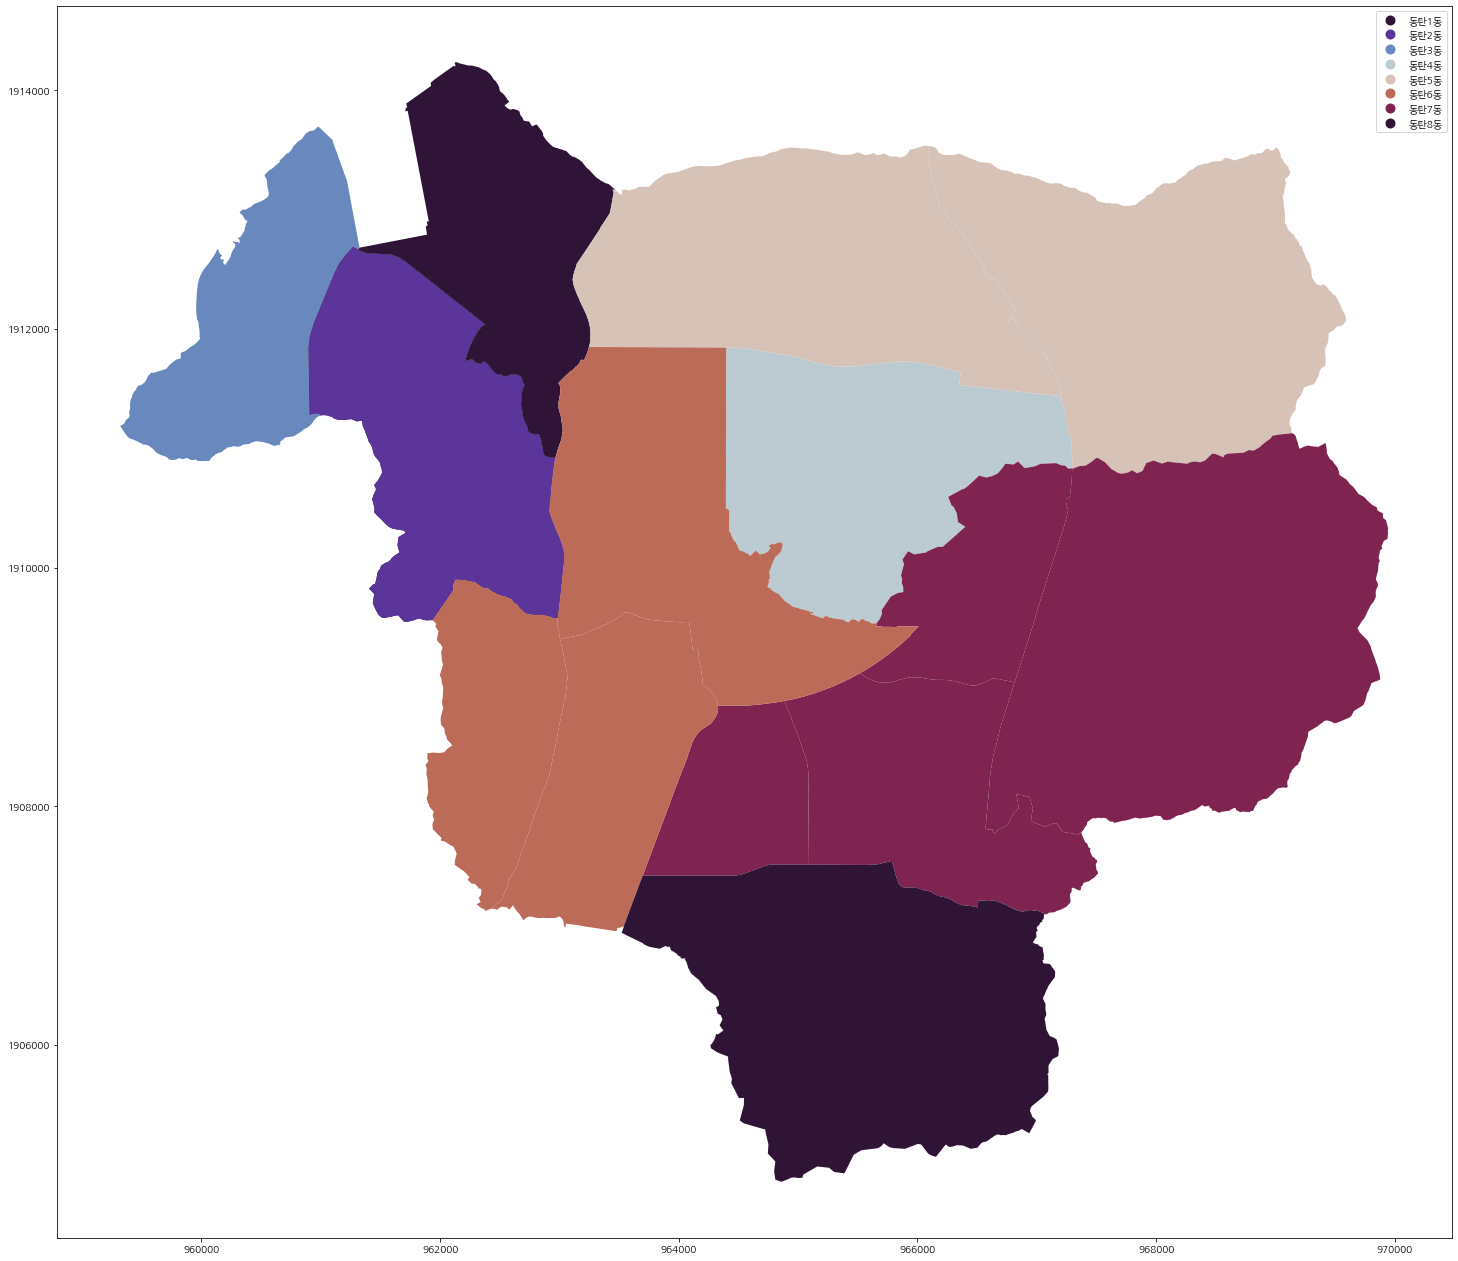

In [46]:
plt.rc('font', family='NanumGothic')
dongtan_ad_area.plot(column='행정동(행정기관명)',figsize=(25,25),cmap='twilight_shifted',categorical=True,legend=True)